<a href="https://www.kaggle.com/code/amaninaman/map-visualisation-preprocessing-bar-charts?scriptVersionId=157855502" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

(1) Firstly, a new column named **"DATE TIME OCC"** was created by converting the existing "TIME OCC" column to datetime64 format and merging it with the original "DATE" column. This transformation involved converting entries, which ranged from one to four-digit integers, to a consistent 00:00:00 time format. Subsequently,(2) a second new column, **"Mocodes Desc"** was introduced by referencing descriptions from the mo_codes.csv file.(3) Lastly, **a dynamic map visualization** was generated using Plotly, allowing users to interactively explore crime scenes by adjusting the year and crime code parameters. **NOTE THAT THE INTERACTIVE MAP WORKS IN EDIT MODE NOT ON THE NOTEBOOK PAGE**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarning for Series.__getitem__
warnings.filterwarnings("ignore", category=FutureWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/la-crime-data-2010-to-2023/mo_codes.csv
/kaggle/input/la-crime-data-2010-to-2023/la_crime_2010_to_2023.csv


Just in case to see descriptions

In [2]:
desc={
"Column Name":"Description",
"division_number":"Numeric code representing the division",
"date_reported":"Date when the crime was reported",
"date_occurred":"Actual date and time when the crime occurred",
"time_occ":"Actual time of occurance",
"area":"Numeric code representing the area",
"area_name":"Name of the area where the crime occurred",
"reporting_district":"Numeric code of the reporting district",
"part":"Part number of the crime",
"crime_code":"Numeric code representing the type of crime",
"crime_description":"Detailed description of the crime",
"modus_operandi":"Methods or patterns in the crime execution",
"victim_age":"Age of the victim",
"victim_sex":"Gender of the victim",
"victim_descent":"Ethnic descent of the victim",
"premise_code":"Code for the type of location of the crime",
"premise_description":"Description of the premise where crime occurred",
"weapon_code":"Code for the weapon used (if any)",
"weapon_description":"Description of the weapon used",
"status":"Status of the crime report",
"status_description":"Detailed status of the crime",
"crime_code_1":"Additional code related to the crime",
"crime_code_2":"Additional code related to the crime",
"crime_code_3":"Additional code related to the crime",
"crime_code_4":"Additional code related to the crime",
"location":"General location description of the crime",
"cross_street":"Nearby cross street (if applicable)",
"latitude":"Latitude coordinate of the crime location",
"longitude":"Longitude coordinate of the crime location"
}

descriptions=pd.DataFrame.from_dict(desc,orient="index",)
descriptions

,0
Column Name,Description
division_number,Numeric code representing the division
date_reported,Date when the crime was reported
date_occurred,Actual date and time when the crime occurred
time_occ,Actual time of occurance
area,Numeric code representing the area
area_name,Name of the area where the crime occurred
reporting_district,Numeric code of the reporting district
part,Part number of the crime
crime_code,Numeric code representing the type of crime


# (1) TRANSFORMING "TIME OCC" and CREATING "DATE TIME OCC"
The entries in "DATE OCC" column is showing the same hour "12:00:00 AM" and "TIME OCC" column is in int64 datatype with uncosistent values. In this section, I have mergred the date information in "DATE OCC" and transformed "TIME OCC" column into a regular time format.  

In [3]:
df=pd.read_csv("/kaggle/input/la-crime-data-2010-to-2023/la_crime_2010_to_2023.csv")

df.head(35)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN
5,100100506,01/05/2010 12:00:00 AM,01/04/2010 12:00:00 AM,1650,1.0,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577,NaN
6,100100508,01/08/2010 12:00:00 AM,01/07/2010 12:00:00 AM,2005,1.0,Central,182,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643,NaN
7,100100509,01/09/2010 12:00:00 AM,01/08/2010 12:00:00 AM,2100,1.0,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Adult Arrest,230.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427,NaN
8,100100510,01/09/2010 12:00:00 AM,01/09/2010 12:00:00 AM,230,1.0,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,34.0450,-118.2640,NaN
9,100100511,01/09/2010 12:00:00 AM,01/06/2010 12:00:00 AM,2100,1.0,Central,132,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,Invest Cont,341.0,998.0,NaN,NaN,200 S OLIVE ST,NaN,34.0538,-118.2488,NaN


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993433 entries, 0 to 2993432
Data columns (total 29 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           2993433 non-null  int64  
 1   Date Rptd       2993433 non-null  object 
 2   DATE OCC        2993433 non-null  object 
 3   TIME OCC        2993433 non-null  int64  
 4   AREA            2135775 non-null  float64
 5   AREA NAME       2993433 non-null  object 
 6   Rpt Dist No     2993433 non-null  int64  
 7   Part 1-2        2993433 non-null  int64  
 8   Crm Cd          2993433 non-null  int64  
 9   Crm Cd Desc     2993433 non-null  object 
 10  Mocodes         2641318 non-null  object 
 11  Vict Age        2993433 non-null  int64  
 12  Vict Sex        2678475 non-null  object 
 13  Vict Descent    2678422 non-null  object 
 14  Premis Cd       2993376 non-null  float64
 15  Premis Desc     2992716 non-null  object 
 16  Weapon Used Cd  1015019 non-null  fl

In [5]:
df['DATE OCC']=pd.to_datetime(df['DATE OCC'],format="%m/%d/%Y %I:%M:%S %p")

df['Date Rptd']=pd.to_datetime(df['Date Rptd'],format="%m/%d/%Y %I:%M:%S %p")

df[['DATE OCC','Date Rptd']]

,DATE OCC,Date Rptd
0,2010-02-20,2010-02-20
1,2010-09-12,2010-09-13
2,2010-08-09,2010-08-09
3,2010-01-05,2010-01-05
4,2010-01-02,2010-01-03
...,...,...
2993428,2023-03-22,2023-03-22
2993429,2023-04-12,2023-04-12
2993430,2023-07-01,2023-07-02
2993431,2023-03-05,2023-03-05


So, the values are between 1 to 2359 represents the time values. The pattern of the values shows that the zeros at the beginning are missing but they are seen if one of the previous digits are not zero. According to this assumption 1 is 00:01, 1350 is 13:50, 45 is 00:45, 1515 is 15:15, 150 is 01:50 etc.

2359
1


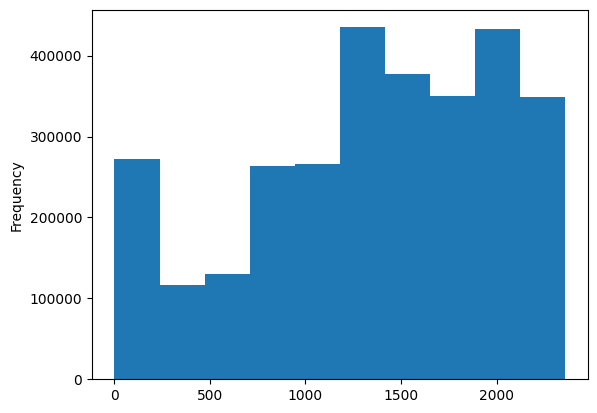

In [6]:
df['TIME OCC'].plot(kind="hist")
print(df['TIME OCC'].max())
print(df['TIME OCC'].min())

In [7]:
from IPython.display import clear_output
time_occ=pd.Series(df['TIME OCC'],dtype="object")

# Iterate through the values of TIME OCC to standardize these entries
for index,value in time_occ.items():
    
    # Adjust entries to four digits by adding zeros with string concat
    if len(str(value))==3: time_occ.loc[index]="0"+str(value)
    elif len(str(value))==2: time_occ.loc[index]="00"+str(value)
    elif len(str(value))==1: time_occ.loc[index]="000"+str(value)
    
    #this is to see the progress during the processing
    if index%1000==0: 
        clear_output(wait=True)
        print(str(value)+ " :::: "+ str(len(str(value))))
        print("Completed : %"+ str((index / len(time_occ) *100)))
    if index==len(time_occ)-1: 
        clear_output(wait=True)
        print("Completed : %100")


Completed : %100


We can now add the digits for seconds ":00" to facilitate the datetime convertion process.

In [8]:
time_occ=time_occ.astype(str).str[:2] + ':' + time_occ.astype(str).str[2:]+':00'
time_occ

0          13:50:00
1          00:45:00
2          15:15:00
3          01:50:00
4          21:00:00
             ...   
2993428    10:00:00
2993429    16:30:00
2993430    00:01:00
2993431    09:00:00
2993432    23:00:00
Name: TIME OCC, Length: 2993433, dtype: object

In [9]:
DATE_OCC=pd.Series(df['DATE OCC'],dtype="object")
DATE_OCC.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2993433 entries, 0 to 2993432
Series name: DATE OCC
Non-Null Count    Dtype 
--------------    ----- 
2993433 non-null  object
dtypes: object(1)
memory usage: 22.8+ MB


In [10]:
DATE_OCC=DATE_OCC.astype(str).str[:10]
DATE_OCC.head(35)

0     2010-02-20
1     2010-09-12
2     2010-08-09
3     2010-01-05
4     2010-01-02
5     2010-01-04
6     2010-01-07
7     2010-01-08
8     2010-01-09
9     2010-01-06
10    2010-01-14
11    2010-01-14
12    2010-01-15
13    2010-01-15
14    2010-01-15
15    2010-01-16
16    2010-01-23
17    2010-01-23
18    2010-01-23
19    2010-01-26
20    2010-01-28
21    2010-01-29
22    2010-01-31
23    2010-01-31
24    2010-01-31
25    2010-01-31
26    2010-01-31
27    2010-01-31
28    2010-02-03
29    2010-02-01
30    2010-02-05
31    2010-02-06
32    2010-02-05
33    2010-02-08
34    2010-02-08
Name: DATE OCC, dtype: object

Merging the date values from DATE OCC and the transformed time values of TIME OCC below.

In [11]:
DATE_TIME_OCC=DATE_OCC+" "+time_occ
DATE_TIME_OCC.head(35)

0     2010-02-20 13:50:00
1     2010-09-12 00:45:00
2     2010-08-09 15:15:00
3     2010-01-05 01:50:00
4     2010-01-02 21:00:00
5     2010-01-04 16:50:00
6     2010-01-07 20:05:00
7     2010-01-08 21:00:00
8     2010-01-09 02:30:00
9     2010-01-06 21:00:00
10    2010-01-14 14:45:00
11    2010-01-14 20:00:00
12    2010-01-15 02:45:00
13    2010-01-15 17:45:00
14    2010-01-15 20:30:00
15    2010-01-16 17:35:00
16    2010-01-23 12:25:00
17    2010-01-23 11:00:00
18    2010-01-23 20:00:00
19    2010-01-26 18:20:00
20    2010-01-28 23:45:00
21    2010-01-29 16:30:00
22    2010-01-31 01:30:00
23    2010-01-31 10:00:00
24    2010-01-31 17:00:00
25    2010-01-31 22:00:00
26    2010-01-31 19:30:00
27    2010-01-31 17:20:00
28    2010-02-03 12:55:00
29    2010-02-01 13:55:00
30    2010-02-05 14:25:00
31    2010-02-06 01:10:00
32    2010-02-05 20:30:00
33    2010-02-08 16:25:00
34    2010-02-08 18:00:00
dtype: object

In [12]:
DATE_TIME_OCC=pd.to_datetime(DATE_TIME_OCC,format="%Y-%m-%d %H:%M:%S")
DATE_TIME_OCC.head(35)

0    2010-02-20 13:50:00
1    2010-09-12 00:45:00
2    2010-08-09 15:15:00
3    2010-01-05 01:50:00
4    2010-01-02 21:00:00
5    2010-01-04 16:50:00
6    2010-01-07 20:05:00
7    2010-01-08 21:00:00
8    2010-01-09 02:30:00
9    2010-01-06 21:00:00
10   2010-01-14 14:45:00
11   2010-01-14 20:00:00
12   2010-01-15 02:45:00
13   2010-01-15 17:45:00
14   2010-01-15 20:30:00
15   2010-01-16 17:35:00
16   2010-01-23 12:25:00
17   2010-01-23 11:00:00
18   2010-01-23 20:00:00
19   2010-01-26 18:20:00
20   2010-01-28 23:45:00
21   2010-01-29 16:30:00
22   2010-01-31 01:30:00
23   2010-01-31 10:00:00
24   2010-01-31 17:00:00
25   2010-01-31 22:00:00
26   2010-01-31 19:30:00
27   2010-01-31 17:20:00
28   2010-02-03 12:55:00
29   2010-02-01 13:55:00
30   2010-02-05 14:25:00
31   2010-02-06 01:10:00
32   2010-02-05 20:30:00
33   2010-02-08 16:25:00
34   2010-02-08 18:00:00
dtype: datetime64[ns]

In [13]:
index_to_insert = 4
df.insert(index_to_insert, "DATE TIME OCC", DATE_TIME_OCC)
df['DATE TIME OCC']=pd.to_datetime(df['DATE TIME OCC'],format="%Y-%m-%d %H:%M:%S")
df.head(15)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,DATE TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,2010-02-20,2010-02-20,1350,2010-02-20 13:50:00,13.0,Newton,1385,2,900,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,2010-09-13,2010-09-12,45,2010-09-12 00:45:00,14.0,Pacific,1485,2,740,...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,2010-08-09,2010-08-09,1515,2010-08-09 15:15:00,13.0,Newton,1324,2,946,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,2010-01-05,2010-01-05,150,2010-01-05 01:50:00,6.0,Hollywood,646,2,900,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,2010-01-03,2010-01-02,2100,2010-01-02 21:00:00,1.0,Central,176,1,122,...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN
5,100100506,2010-01-05,2010-01-04,1650,2010-01-04 16:50:00,1.0,Central,162,1,442,...,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577,NaN
6,100100508,2010-01-08,2010-01-07,2005,2010-01-07 20:05:00,1.0,Central,182,1,330,...,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643,NaN
7,100100509,2010-01-09,2010-01-08,2100,2010-01-08 21:00:00,1.0,Central,157,1,230,...,Adult Arrest,230.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427,NaN
8,100100510,2010-01-09,2010-01-09,230,2010-01-09 02:30:00,1.0,Central,171,1,230,...,Invest Cont,230.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,34.0450,-118.2640,NaN
9,100100511,2010-01-09,2010-01-06,2100,2010-01-06 21:00:00,1.0,Central,132,1,341,...,Invest Cont,341.0,998.0,NaN,NaN,200 S OLIVE ST,NaN,34.0538,-118.2488,NaN


In [14]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993433 entries, 0 to 2993432
Data columns (total 30 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           2993433 non-null  int64         
 1   Date Rptd       2993433 non-null  datetime64[ns]
 2   DATE OCC        2993433 non-null  datetime64[ns]
 3   TIME OCC        2993433 non-null  int64         
 4   DATE TIME OCC   2993433 non-null  datetime64[ns]
 5   AREA            2135775 non-null  float64       
 6   AREA NAME       2993433 non-null  object        
 7   Rpt Dist No     2993433 non-null  int64         
 8   Part 1-2        2993433 non-null  int64         
 9   Crm Cd          2993433 non-null  int64         
 10  Crm Cd Desc     2993433 non-null  object        
 11  Mocodes         2641318 non-null  object        
 12  Vict Age        2993433 non-null  int64         
 13  Vict Sex        2678475 non-null  object        
 14  Vict Descent    26

# (2) CREATING "Mocodes Desc" COLUMN
Using "mo_codes.csv", a function was created to get the mocode descriptions and the entries of the new column were assigned with an iteration. 

In [15]:
mo=pd.read_csv("/kaggle/input/la-crime-data-2010-to-2023/mo_codes.csv")
mo.head(35)

,code,description
0,100,Suspect Impersonate
1,101,Aid victim
2,102,Blind
3,103,Crippled
4,104,Customer
5,105,Delivery
6,106,Doctor
7,107,God
8,108,Infirm
9,109,Inspector


In [16]:
mo['code'].unique()

array([ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        112,  113,  114,  115,  116,  117,  118,  119,  120,  121,  122,
        123,  200,  201,  202,  203,  204,  205,  206,  207,  208,  209,
        210,  211,  212,  213,  214,  215,  216,  217,  218,  219,  220,
        301,  302,  303,  304,  305,  306,  307,  308,  309,  310,  311,
        312,  313,  314,  315,  316,  317,  318,  319,  320,  321,  322,
        323,  324,  325,  326,  327,  328,  329,  330,  331,  332,  333,
        334,  335,  336,  337,  338,  339,  340,  341,  342,  343,  344,
        345,  346,  347,  348,  349,  350,  351,  352,  353,  354,  355,
        356,  357,  358,  359,  360,  361,  362,  363,  364,  365,  366,
        367,  368,  369,  370,  371,  372,  373,  374,  375,  376,  377,
        378,  379,  380,  381,  382,  383,  384,  385,  386,  387,  388,
        389,  390,  391,  392,  393,  394,  395,  396,  397,  398,  399,
        400,  401,  402,  403,  404,  405,  406,  4

As it is seen in the outputs below, there are entries containing more than one mocode. Therefore, the descriptions of mocodes should be in a multi-dimensional list format.

In [17]:
df['Mocodes'].value_counts()

Mocodes
0344                                  245349
0329                                  107678
1501                                   50795
0325                                   33893
0416                                   31807
                                       ...  
0400 0510 1268 2005 1817                   1
0416 0397                                  1
2000 0400 0448 0416 1414 1813 0429         1
0522 1258 0360 0510                        1
0601 0445 0416 0359                        1
Name: count, Length: 726643, dtype: int64

In [18]:
mo['code'].duplicated(keep='last').value_counts()

code
False    777
Name: count, dtype: int64

In [19]:
mo[mo['code']==325]

,code,description
68,325,Took merchandise


In [20]:
#Most common 10 mocodes in the dataset
df['Mocodes'].value_counts().head(10)

Mocodes
0344         245349
0329         107678
1501          50795
0325          33893
0416          31807
1822          23340
0329 1300     23074
0344 1300     18157
1822 0344     15687
0377          15191
Name: count, dtype: int64

In [21]:
df['Mocodes'].iloc[4500:4590].to_frame()

,Mocodes
4500,0416
4501,0344
4502,0344
4503,1501
4504,1501
...,...
4585,0344 0400
4586,0344 1300
4587,0417
4588,0344 0601 2004


There are 352115 null values so the function will have to handle this too..

In [22]:
df['Mocodes'].isna().value_counts()

Mocodes
False    2641318
True      352115
Name: count, dtype: int64

get_mocode_desc function checks for null items first, removes the zeros of the values starting with 0*, then splits the values by space character, and ensures that the all characters are numeric. The function returns the description matching in the mo_codes dataframe.
 * There is no value in mo_codes.csv starting with 0. Etc. 146 != 0146

In [23]:
def get_mocode_desc(item):
    
    if pd.isna(item):
        return np.array(item)
    
    splitted_list = item.split()
    
    splitted_list = [sl_item.lstrip('0') for sl_item in splitted_list]
    
    splitted_list = [sl_item for sl_item in splitted_list if any(char.isdigit() for char in sl_item)]
    
    splitted_list=np.array(splitted_list,dtype="int64")
    
    desc=np.array([],dtype="object")
    for value in splitted_list:
        for index,code in mo['code'].items():
            if value==code:
                desc=np.append(desc,mo.iloc[index,1])
            
    return desc
    
    

In [24]:
print(df['Mocodes'].iloc[101])
print(get_mocode_desc(df['Mocodes'].iloc[101]))
print(type(get_mocode_desc(df['Mocodes'].iloc[101])))

print(df['Mocodes'].iloc[104])
print(get_mocode_desc(df['Mocodes'].iloc[104]))
print(type(get_mocode_desc(df['Mocodes'].iloc[104])))

print(df['Mocodes'].iloc[4589])
print(get_mocode_desc(df['Mocodes'].iloc[4589]))
print(type(get_mocode_desc(df['Mocodes'].iloc[4589])))

nan
nan
<class 'numpy.ndarray'>
0416 0429
['Hit-Hit w/ weapon' 'Vict knocked to ground']
<class 'numpy.ndarray'>
0416 0429 0906 1402 2004
['Hit-Hit w/ weapon' 'Vict knocked to ground' 'Gangs'
 'Evidence Booked (any crime)' 'Suspect is homeless/transient']
<class 'numpy.ndarray'>


In [25]:
for item in df['Mocodes'].value_counts().head(10).items():
    print(get_mocode_desc(item[0]))

['Removes vict property']
['Vandalized']
['Other MO (see rpt)']
['Took merchandise']
['Hit-Hit w/ weapon']
['Stranger']
['Vandalized' 'Vehicle involved']
['Removes vict property' 'Vehicle involved']
['Stranger' 'Removes vict property']
["Takes vict's identification/driver license"]


Since numpy's np.append() is inefficient in a loop, the collection of the returning values is stored in a regular python list.

In [26]:
mocodes_Desc=[]

for index, value in df['Mocodes'].items():
    
    try:
    
        mocodes_Desc.append(get_mocode_desc(value))

        if index%1000==0: 
            clear_output(wait=True)
            print(str(value)+ " :::: "+ str(mocodes_Desc[index]))
            print("Completed : %"+ str((index / df['Mocodes'].shape[0] *100)))
        if index== df['Mocodes'].shape[0]-1: 
            clear_output(wait=True)
            print("Completed : %100")
    except Exception as e:
        print(f"Error at iteration {index}:{e}")

Completed : %100


In [27]:
index_to_insert = 12
df.insert(index_to_insert, "Mocodes Desc", mocodes_Desc)
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993433 entries, 0 to 2993432
Data columns (total 31 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           2993433 non-null  int64         
 1   Date Rptd       2993433 non-null  datetime64[ns]
 2   DATE OCC        2993433 non-null  datetime64[ns]
 3   TIME OCC        2993433 non-null  int64         
 4   DATE TIME OCC   2993433 non-null  datetime64[ns]
 5   AREA            2135775 non-null  float64       
 6   AREA NAME       2993433 non-null  object        
 7   Rpt Dist No     2993433 non-null  int64         
 8   Part 1-2        2993433 non-null  int64         
 9   Crm Cd          2993433 non-null  int64         
 10  Crm Cd Desc     2993433 non-null  object        
 11  Mocodes         2641318 non-null  object        
 12  Mocodes Desc    2993433 non-null  object        
 13  Vict Age        2993433 non-null  int64         
 14  Vict Sex        26

In [28]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993433 entries, 0 to 2993432
Data columns (total 31 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           2993433 non-null  int64         
 1   Date Rptd       2993433 non-null  datetime64[ns]
 2   DATE OCC        2993433 non-null  datetime64[ns]
 3   TIME OCC        2993433 non-null  int64         
 4   DATE TIME OCC   2993433 non-null  datetime64[ns]
 5   AREA            2135775 non-null  float64       
 6   AREA NAME       2993433 non-null  object        
 7   Rpt Dist No     2993433 non-null  int64         
 8   Part 1-2        2993433 non-null  int64         
 9   Crm Cd          2993433 non-null  int64         
 10  Crm Cd Desc     2993433 non-null  object        
 11  Mocodes         2641318 non-null  object        
 12  Mocodes Desc    2993433 non-null  object        
 13  Vict Age        2993433 non-null  int64         
 14  Vict Sex        26

In [29]:
df.iloc[:,10:15]

,Crm Cd Desc,Mocodes,Mocodes Desc,Vict Age,Vict Sex
0,VIOLATION OF COURT ORDER,0913 1814 2000,"[Victim knew Suspect, Susp is/was current/form...",48,M
1,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,[Vandalized],0,M
2,OTHER MISCELLANEOUS CRIME,0344,[Removes vict property],0,M
3,VIOLATION OF COURT ORDER,1100 0400 1402,"[Shots Fired, Force used, Evidence Booked (any...",47,F
4,"RAPE, ATTEMPTED",0400,[Force used],47,F
...,...,...,...,...,...
2993428,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,"[Hit-Hit w/ weapon, Cut/stabbed, Stranger]",25,F
2993429,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,"[Business, Suspect swung weapon, Hit-Hit w/ we...",29,M
2993430,PICKPOCKET,1822 0344,"[Stranger, Removes vict property]",24,F
2993431,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,"[Vandalized, Stranger]",53,F


In [30]:
df['Crm Cd Desc'].value_counts().to_frame()

,count
Crm Cd Desc,
BATTERY - SIMPLE ASSAULT,259215
VEHICLE - STOLEN,256030
BURGLARY FROM VEHICLE,215945
BURGLARY,200139
THEFT PLAIN - PETTY ($950 & UNDER),193638
...,...
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO),5
TILL TAP - ATTEMPT,4
TRAIN WRECKING,2


Some bar charts showing the most common crimes in LA between 2010-2023:

<Axes: xlabel='Crm Cd Desc'>

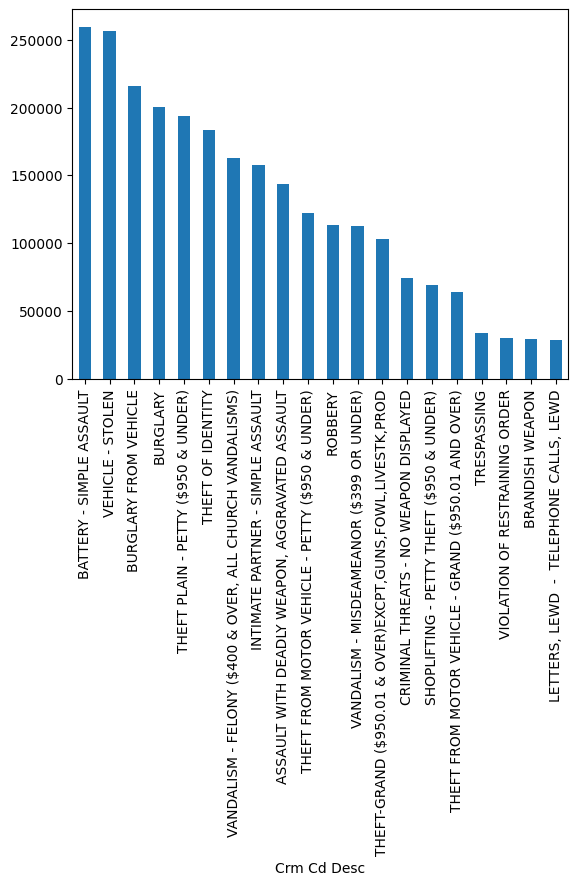

In [31]:
df['Crm Cd Desc'].value_counts().head(20).plot(kind="bar")

Most common crimes by year:

In [32]:
df_vis=df[['Crm Cd Desc','DATE TIME OCC']]
df_vis.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993433 entries, 0 to 2993432
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Crm Cd Desc    2993433 non-null  object        
 1   DATE TIME OCC  2993433 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 45.7+ MB


There were some overlapping issues when creating a subplot area with 7 rows and 2 columns. Therefore, the for loop below is creating a subplot area with 1 row and 2 columns in each iteration without having that problem.

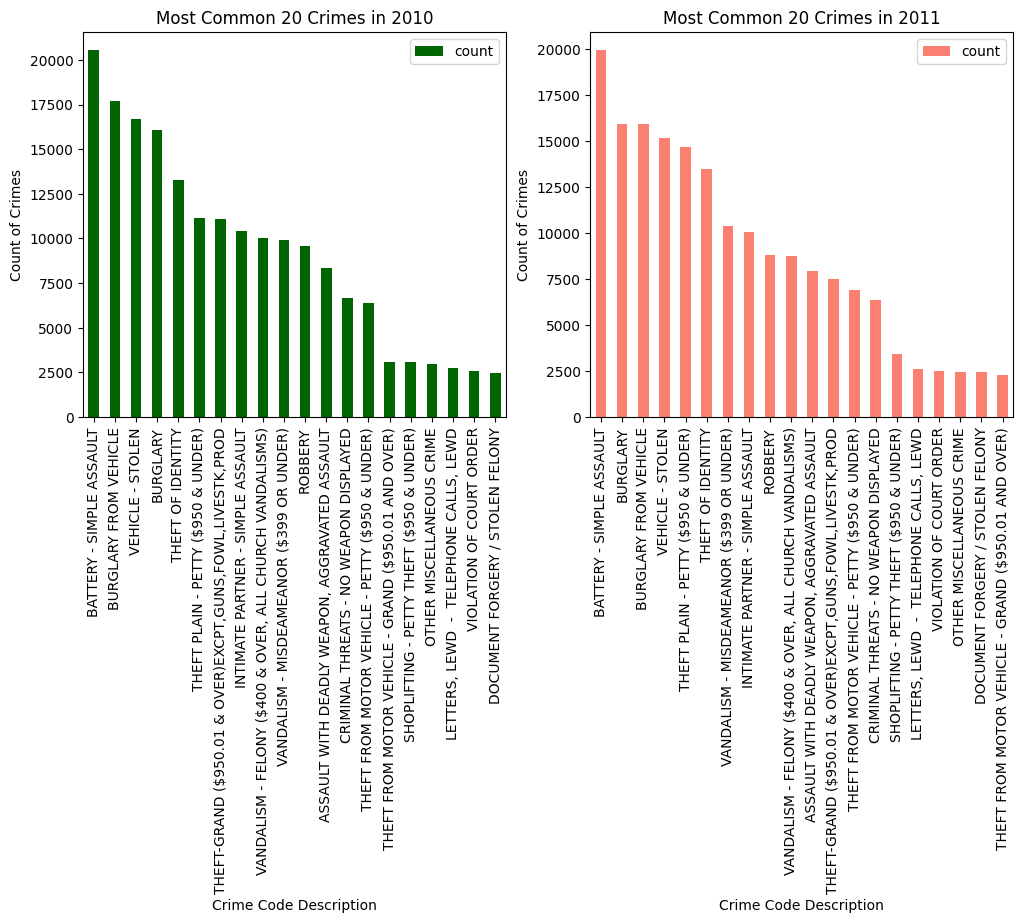

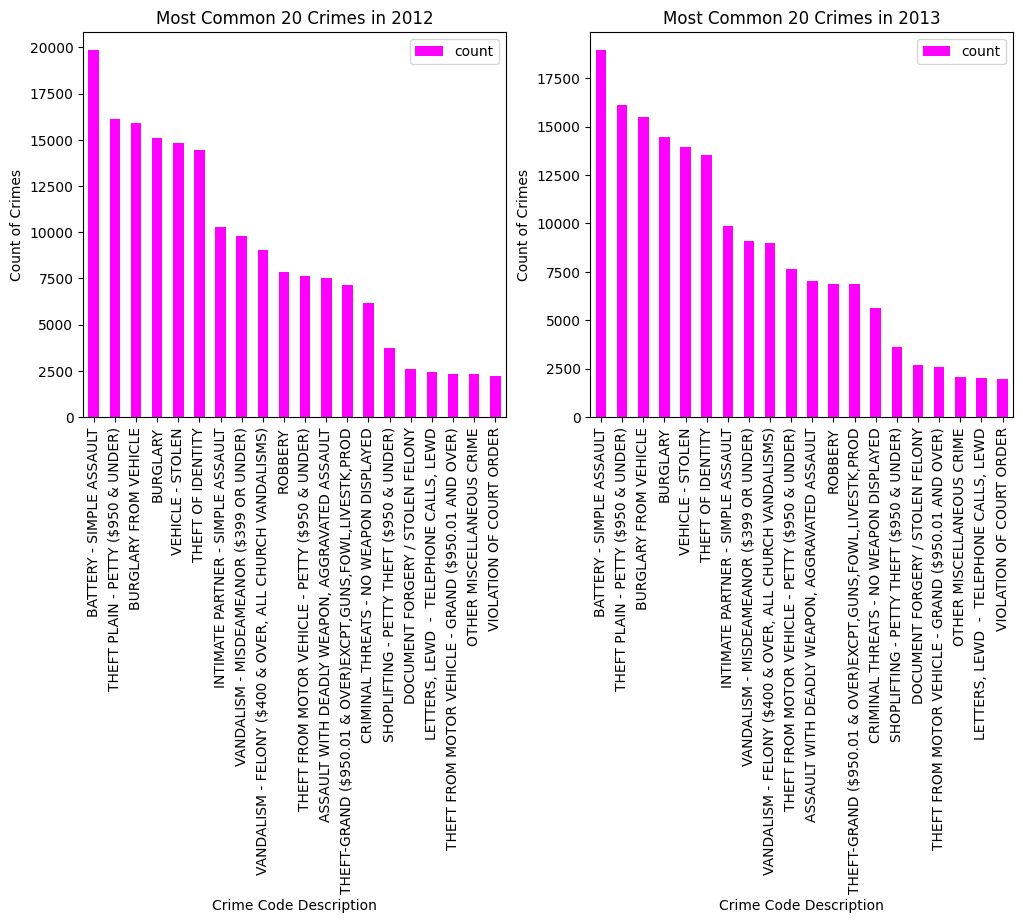

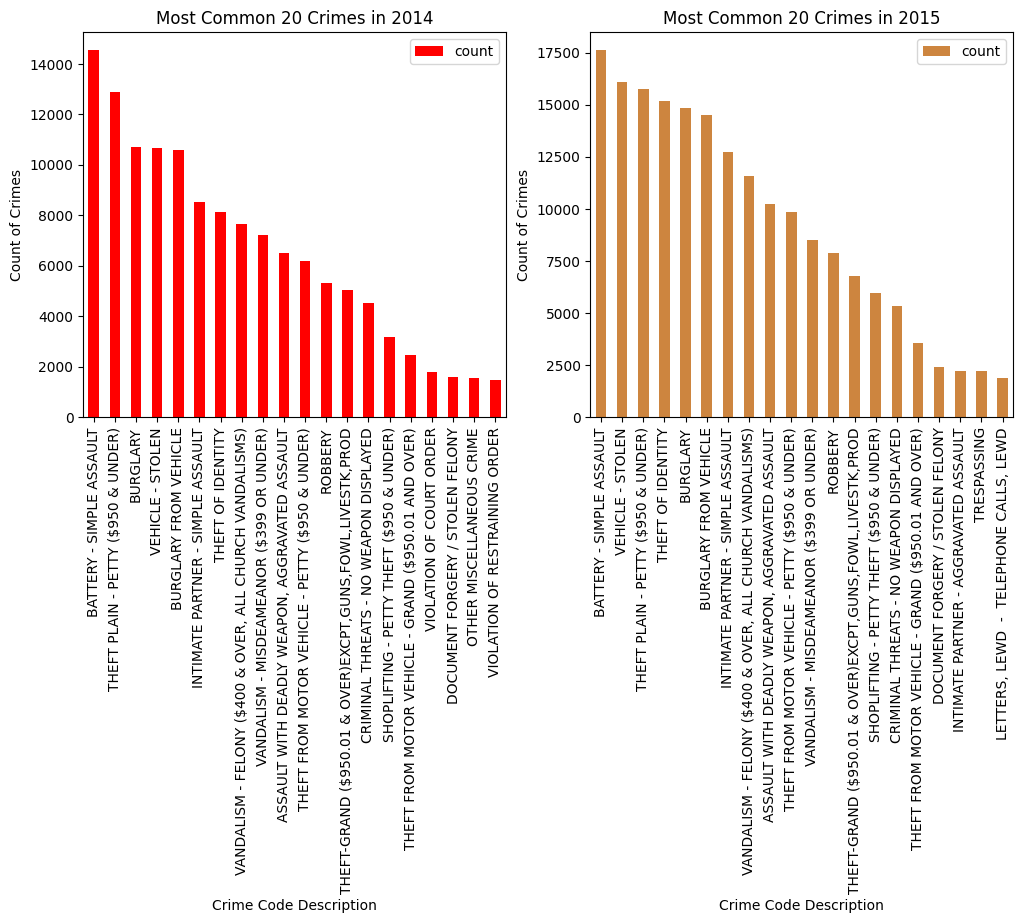

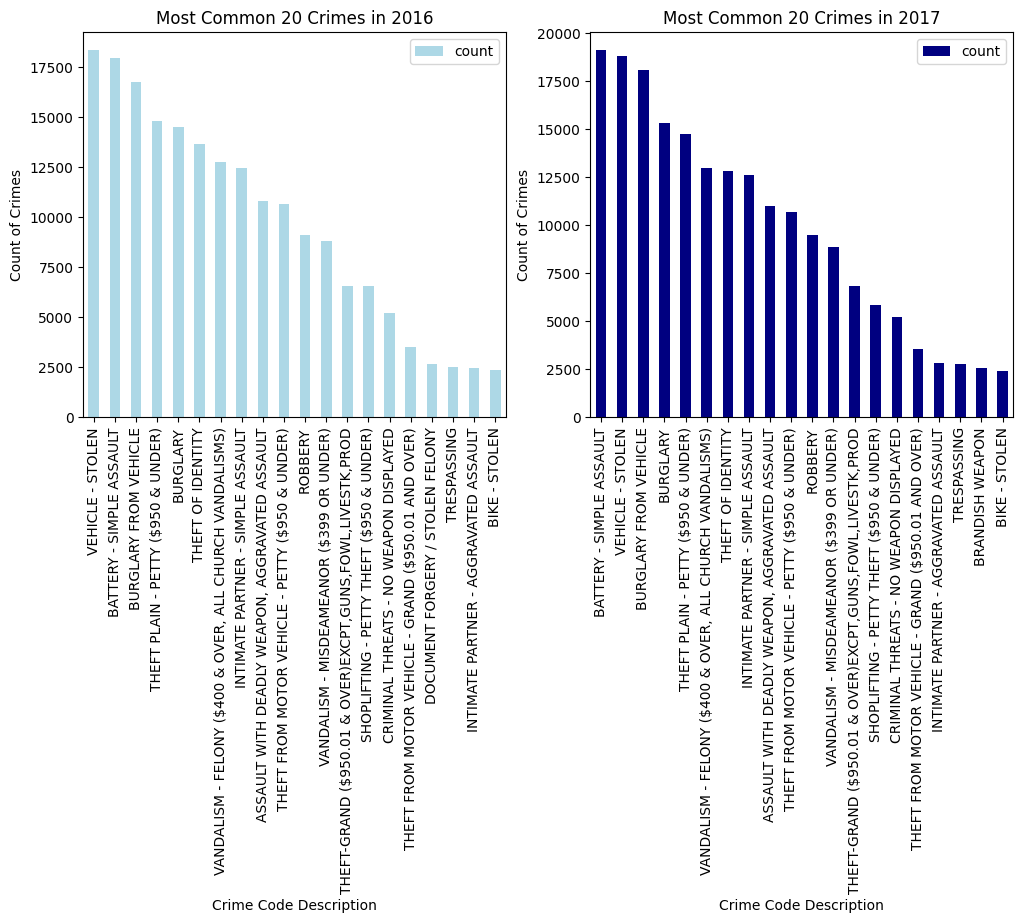

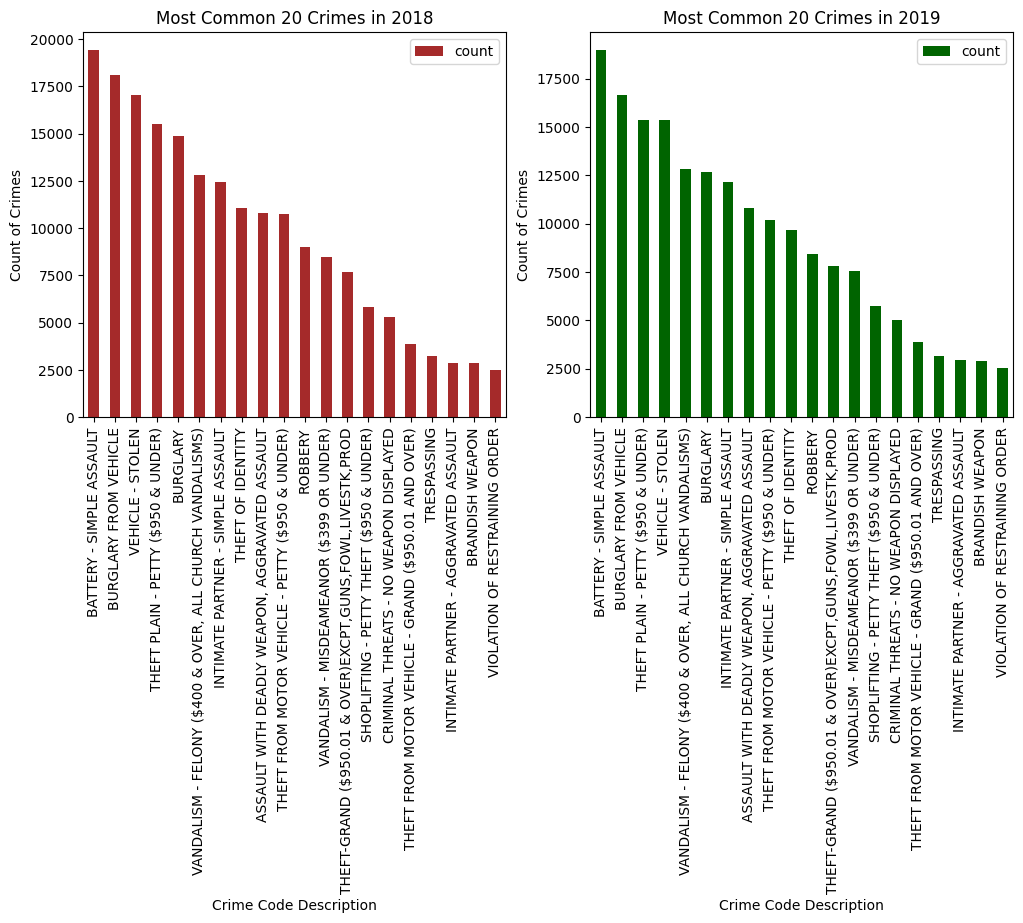

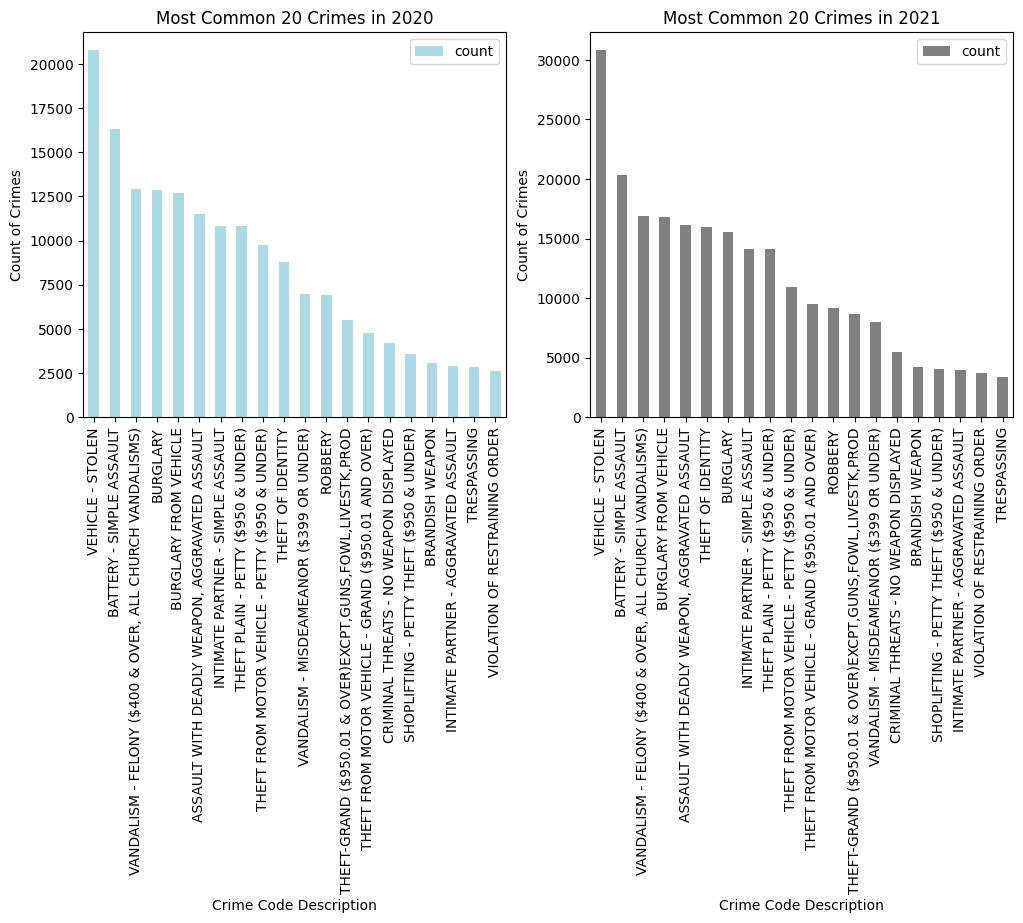

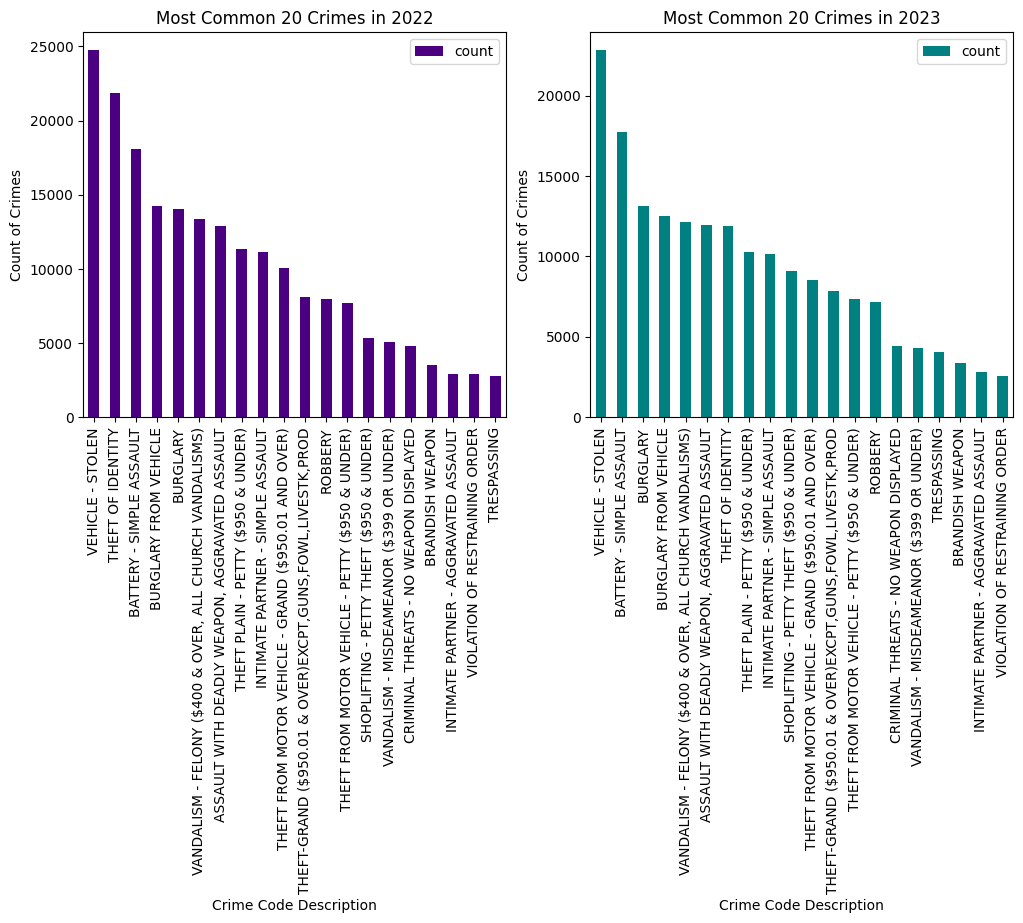

In [33]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black',
              'darkred', 'lightblue', 'darkgreen', 'gold', 'navy', 'indigo', 'lime', 'teal', 'saddlebrown', 'salmon', 'peru', 'tomato']

for year in range(2010, 2023):
    if year%2!=0: continue
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes=axes.flatten()
    # Plot for the left slot of the subplot
    df_subset=df_vis['Crm Cd Desc'].loc[(df_vis['DATE TIME OCC'] >= f"01-01-{year} 00:00:00") & (df_vis['DATE TIME OCC'] < f"01-01-{year + 1} 00:00:00")]
    df_subset.value_counts().head(20).to_frame().plot(kind='bar', ax=axes[0],color=np.random.choice(colors) )
    
    axes[0].set_title(f'Most Common 20 Crimes in {year}')
    axes[0].set_xlabel('Crime Code Description')
    axes[0].set_ylabel('Count of Crimes')

    # Plot for the right slot of the subplot
    df_subset=df_vis['Crm Cd Desc'].loc[(df_vis['DATE TIME OCC'] >= f"01-01-{year+1} 00:00:00") & (df_vis['DATE TIME OCC'] < f"01-01-{year + 2} 00:00:00")]
    df_subset.value_counts().head(20).to_frame().plot(kind='bar', ax=axes[1],color=np.random.choice(colors))
    
    axes[1].set_title(f'Most Common 20 Crimes in {year+1}')
    axes[1].set_xlabel('Crime Code Description')
    axes[1].set_ylabel('Count of Crimes')

    plt.show()

Now, let's have a look at the weapons used within the crimes by year:

In [34]:
weapons_list=pd.DataFrame(df['Weapon Desc'].value_counts().head(10))
weapons_list.reset_index(inplace=True)


In [35]:
weapons_list=weapons_list['Weapon Desc']
weapons_list

0    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1                       UNKNOWN WEAPON/OTHER WEAPON
2                                     VERBAL THREAT
3                                          HAND GUN
4                             SEMI-AUTOMATIC PISTOL
5                  KNIFE WITH BLADE 6INCHES OR LESS
6                                       OTHER KNIFE
7                                   UNKNOWN FIREARM
8                                           VEHICLE
9                                 MACE/PEPPER SPRAY
Name: Weapon Desc, dtype: object

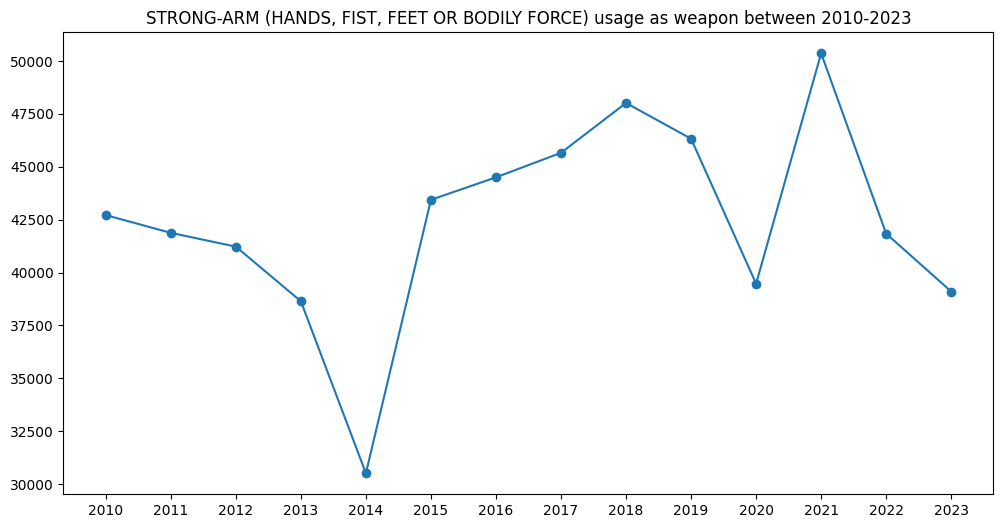

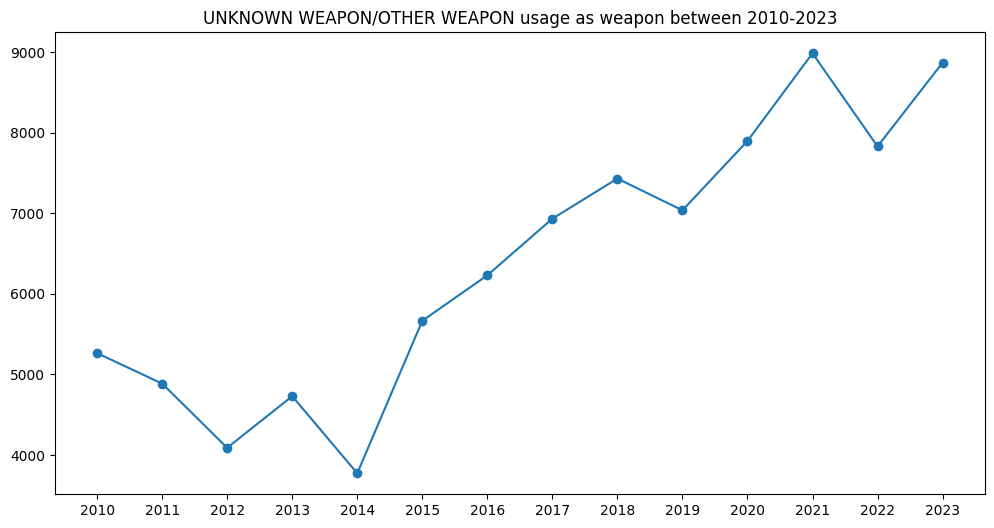

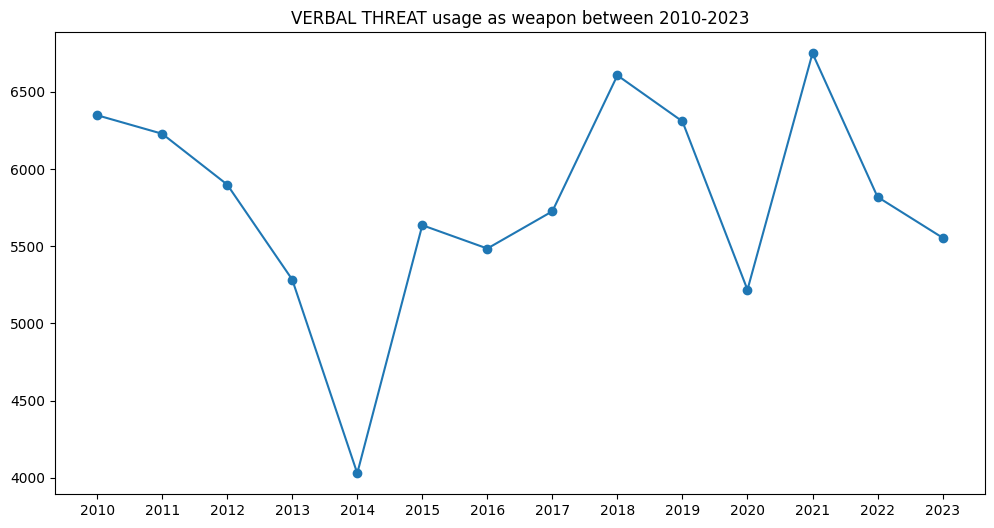

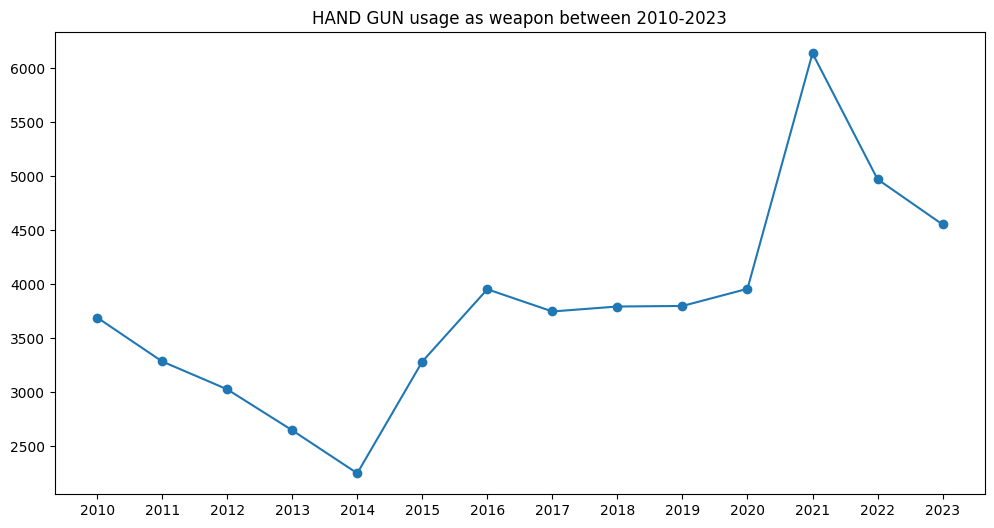

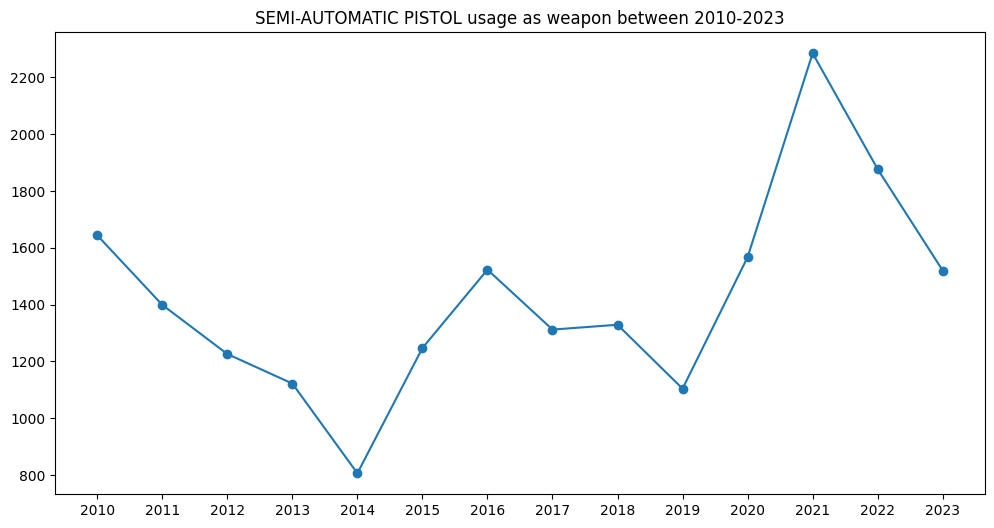

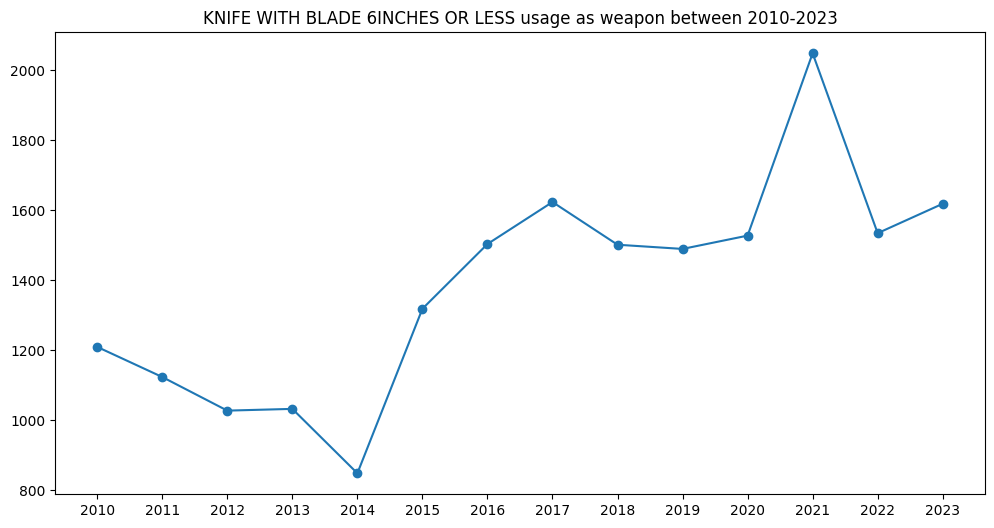

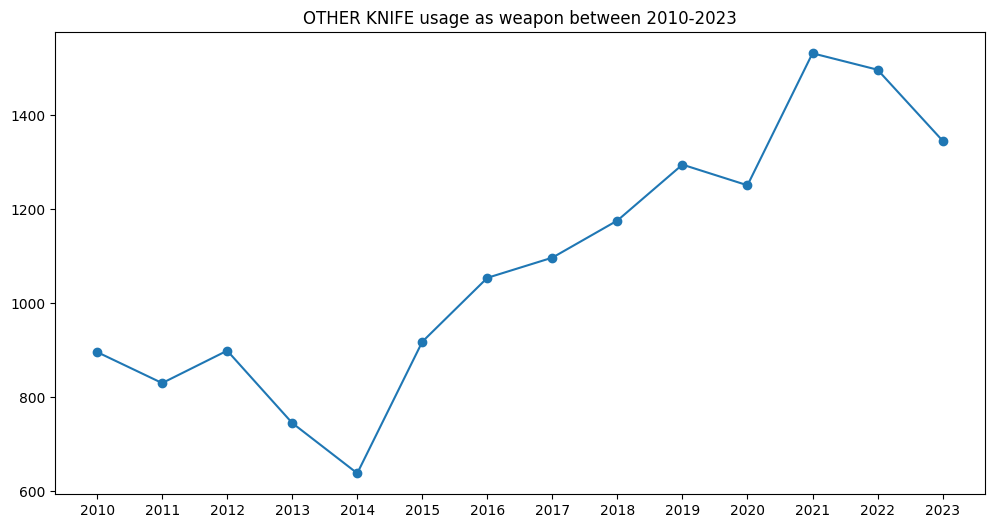

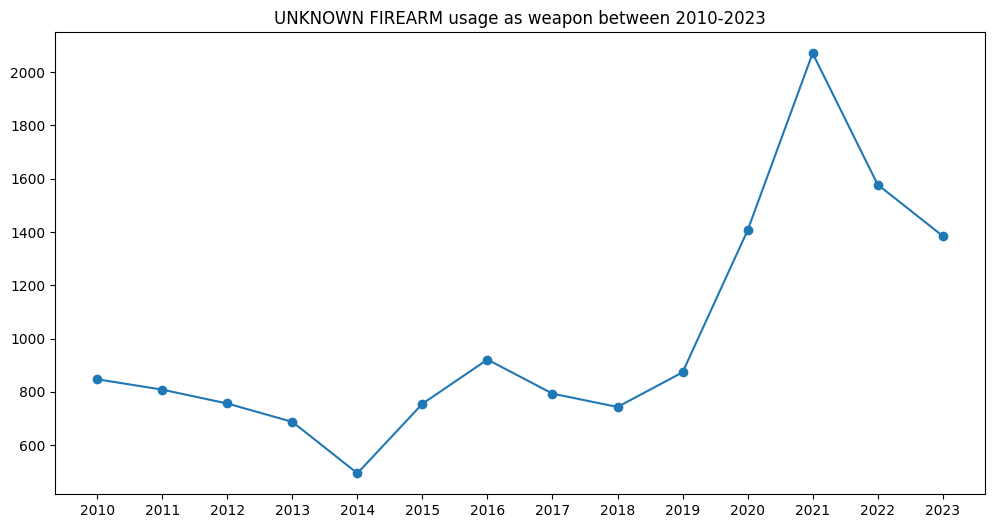

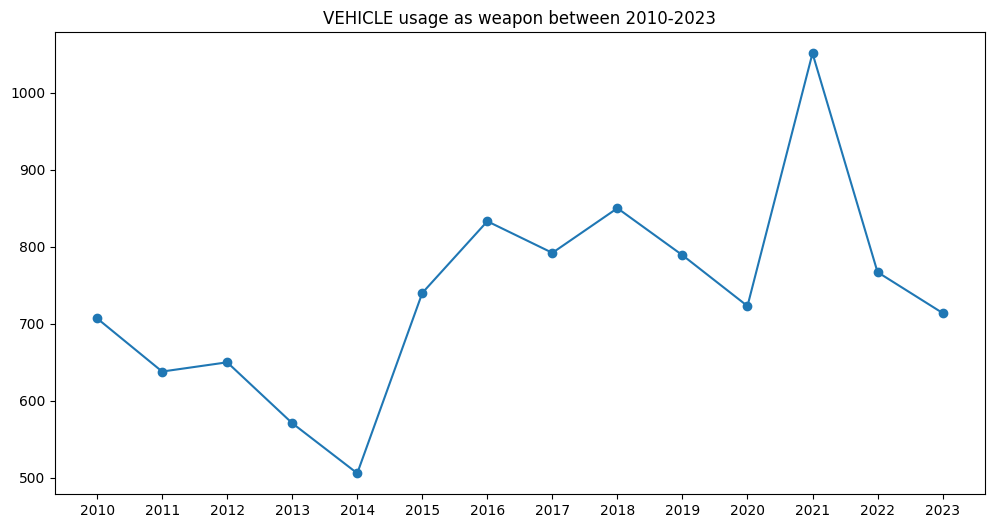

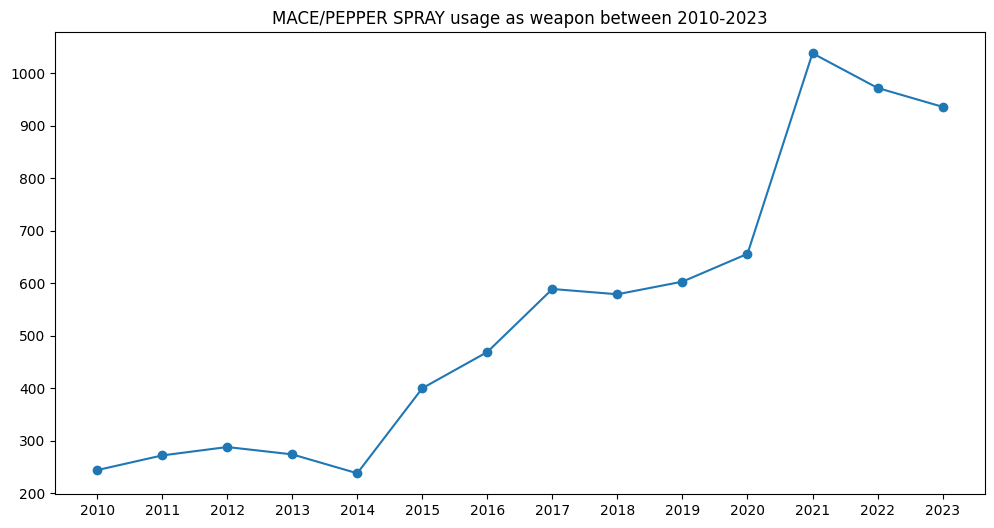

In [36]:
for index,value in weapons_list.items():
    weaponByYear=np.array([],dtype="int64")
    for year in range(2010,2024):
        weaponByYear=np.append(weaponByYear,df['Weapon Desc'].loc[(df['Weapon Desc']==value) & ((df_vis['DATE TIME OCC'] >= f"01-01-{year} 00:00:00") & (df_vis['DATE TIME OCC'] < f"01-01-{year+1} 00:00:00"))].value_counts()[0])
    
    pd.Series(weaponByYear,index=range(2010,2024)).plot(kind="line",marker="o",x=range(2010,2023),figsize=(12,6))
    plt.title(f"{value} usage as weapon between 2010-2023")
    plt.xticks(range(2010,2024), ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"])
    plt.show()

# (3) INTERACTIVE MAP OF CRIMES BY YEAR
You may need to restart the Kernel after installing the ipywidgets, otherwise the widgets may not be seen.

In [37]:
pip install ipywidgets jupyter nbextension enable --py widgetsnbextension


Usage:   
  /opt/conda/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/conda/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/conda/bin/python -m pip install [options] [-e] <vcs project url> ...
  /opt/conda/bin/python -m pip install [options] [-e] <local project path> ...
  /opt/conda/bin/python -m pip install [options] <archive url/path> ...

ambiguous option: --py (--pypi-url, --python, --python-version?)
Note: you may need to restart the kernel to use updated packages.


In [38]:
df_map=df[['DATE TIME OCC','Vict Age','Crm Cd Desc','LAT','LON']]

In [39]:
from ipywidgets import widgets
from ipywidgets import interact
import plotly.express as px

In [40]:
year_widget = widgets.IntSlider(
    value=2010.0,
    min=2010.0,
    max=2023.0,
    step=1.0,
    description='Year:',
    continuous_update=False
)

  

crime_widget = widgets.Dropdown(
    description='Crime Description:   ',
    value='ARSON',
    options=sorted(df_map['Crm Cd Desc'].unique().tolist())
    
)


In [41]:
@interact(
    year     = year_widget, 
    crime   = crime_widget, 
)

def interactive_plot (year=2010,crime='ARSON'):
    temp_df=df_map.loc[(df['Crm Cd Desc']==crime) & (df['DATE TIME OCC'].dt.year==year)]
    
    lat_=temp_df['LAT']
    lon_=temp_df['LON']
    
    fig = px.scatter_mapbox(temp_df, lat = 'LAT', lon = 'LON',
                        center = dict(lat = df.LAT.mean(), lon = df.LON.mean()),
                        zoom = 9,
                        opacity=0.5,
                        width=1000,
                        height=600,
                        mapbox_style = 'carto-positron')
    fig.show()





interactive(children=(IntSlider(value=2010, continuous_update=False, description='Year:', max=2023, min=2010),…